## Projeto Final
### **Aluno**: Lucas Bernardo da Costa



### **Projeto**: Classificar os tipos de panelas em um catálogo de panelas de cozinha. As classes são: *Travessa de forno, Frigideira e Panela de Pressão*

#### **Metodologia:** Foi usado o Roboflow para classificar as panelas, dividindo entre 70% de treino, 20% de teste e 10% de validação. Após isto, foi usado um algorítimo YoloV5 para realizar o treino e validação do sistema. Foram usados 5 epochs.

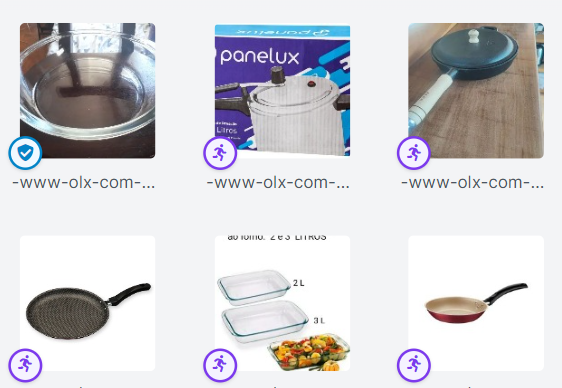

###**Instalando aplicações necessárias**

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-235-g6ca8f33 Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)


In [2]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.87M/4.87M [00:00<00:00, 212MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 286MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 265MB/s]

100%|██████████| 50.9M/50.9M [00:00<00:00, 294MB/s]

100%|██████████| 92.0M/92.0M [00:00<00:00, 132MB/s]



In [3]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open('bananas.jpg', 'wb') as handler:
    handler.write(response.content)

In [4]:
#Infer using classify/predict.py
!python classify/predict.py --weights ./weigths/yolov5s-cls.pt --source bananas.jpg

classify/predict: weights=['./weigths/yolov5s-cls.pt'], source=bananas.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-235-g6ca8f33 Python-3.10.12 torch-2.1.0+cu118 CPU

100% 10.5M/10.5M [00:00<00:00, 231MB/s]

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
image 1/1 /content/yolov5/bananas.jpg: 224x224 banana 0.96, zucchini 0.00, acorn squash 0.00, spaghetti squash 0.00, green mamba 0.00, 37.3ms
Speed: 0.1ms pre-process, 37.3ms inference, 3.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


###**Importando o dataset**

In [5]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zhItTXYNQzyBczYodhyK")
project = rf.workspace("cesar-school-h4lgz").project("classificador-de-panelas")
dataset = project.version(4).download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to classificador-de-panelas-4 in folder:: 100%|██████████| 469/469 [00:00<00:00, 3018.63it/s]


In [7]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["classificador-de-panelas-4"] = dataset_name

###**Treinando o algorítmo**

In [8]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data $"classificador-de-panelas-4" --epochs 5 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
2023-11-04 10:55:12.493137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 10:55:12.493211: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 10:55:12.493258: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
classify/train: model=yolov5s-cls.pt, data=classificador-de-panelas-4, epochs=5, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=

###**Validando o algorítmo**

In [10]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$"classificador-de-panelas-4"

classify/val: data=../datasets/classificador-de-panelas-4, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-235-g6ca8f33 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 117 layers, 4170531 parameters, 0 gradients, 10.4 GFLOPs
testing: 100% 1/1 [00:01<00:00,  1.03s/it]
                   Class      Images    top1_acc    top5_acc
                     all          19       0.474           1
              Frigideira           9           1           1
       Panela-de-pressao           8           0           1
                Travessa           2           0           1
Speed: 0.0ms pre-process, 43.2ms inference, 0.0ms post-process per image at shape (1, 3, 224, 224)
Results saved to runs/val-cls/exp2


Inferring on an example of the class 'Frigideira'
classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/datasets/classificador-de-panelas-4/test/Frigideira/-www-olx-com-br-970-260356555428277_jpg.rf.73b4ea0b5a884b0595851419c8607edb.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-235-g6ca8f33 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 117 layers, 4170531 parameters, 0 gradients, 10.4 GFLOPs
image 1/1 /content/datasets/classificador-de-panelas-4/test/Frigideira/-www-olx-com-br-970-260356555428277_jpg.rf.73b4ea0b5a884b0595851419c8607edb.jpg: 224x224 Frigideira 0.45, Travessa 0.28, Panela-de-pressao 0.27, 35.0ms
Speed: 0.1ms pre-process, 35.0ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/ex

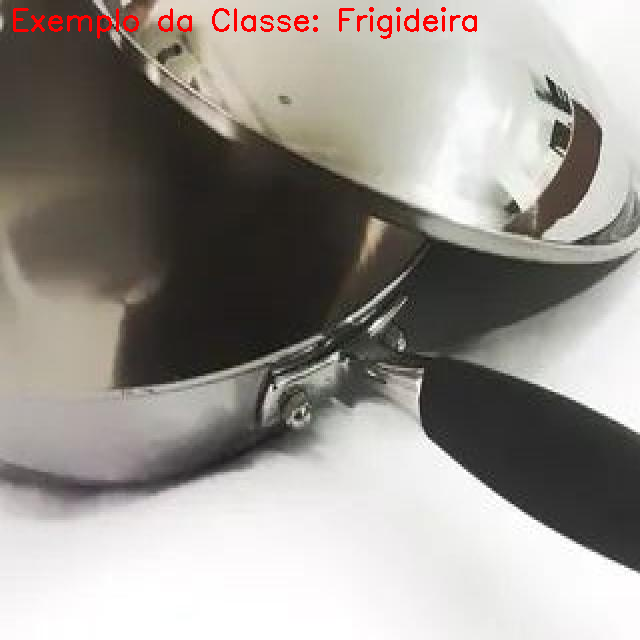

In [21]:
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset.location, "test")):
  split_path = os.path.join(dataset.location, "test")
else:
  os.path.join(dataset.location, "valid")
example_class = os.listdir(split_path)[0]
example_image_name = os.listdir(os.path.join(split_path, example_class))[0]
example_image_path = os.path.join(split_path, example_class, example_image_name)
os.environ["TEST_IMAGE_PATH"] = example_image_path

print(f"Inferring on an example of the class '{example_class}'")

#Infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source $TEST_IMAGE_PATH

import os
from google.colab.patches import cv2_imshow  # Importe cv2_imshow

# Carregar a imagem
example_image = cv2.imread(example_image_path)

if example_image is not None:
    # Adicionar a legenda com o nome da classe à imagem
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (10, 30)  # Coordenadas onde a legenda será exibida
    font_scale = 1
    font_color = (0, 0, 255)  # Cor da legenda (vermelho no formato BGR)
    font_thickness = 2
    class_name = f"Exemplo da Classe: {example_class}"
    example_image_with_caption = cv2.putText(example_image, class_name, org, font, font_scale, font_color, font_thickness)

    # Exibir a imagem com a legenda
    cv2_imshow(example_image_with_caption)


### Reference Files:
###### https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov5-classification-on-custom-data.ipynb